<h2> 1 -- Load images into 3d tensors<h2>

In [21]:
import os
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from tqdm import tqdm

# Load function
def load_images(folder):
    imgs = []
    for file in tqdm(os.listdir(folder)):
        if file.lower().endswith(('.jpeg')):
            img = io.imread(os.path.join(folder, file), as_gray=True)
            imgs.append(img)
    return np.array(imgs)

# Loading the data
normal_imgs = load_images('NORMAL')
pneumonia_imgs = load_images('PNEUMONIA')

100%|██████████| 390/390 [00:00<00:00, 615.91it/s]


<h2>2 -- Reshape to 4D tensors

In [ ]:
# Adding a channel dimension 
normal_imgs = normal_imgs[..., np.newaxis]
pneumonia_imgs = pneumonia_imgs[..., np.newaxis]

<h2>Display tensor shapes and image dimensions

In [23]:
print("Normal shape:", normal_imgs.shape)
print("Pneumonia shape:", pneumonia_imgs.shape)

# Checking dimensions
img_h, img_w = normal_imgs.shape[1:3]
print(f"Each image is {img_h}x{img_w}")

Normal shape: (234, 1000, 800, 1)
Pneumonia shape: (390, 1000, 800, 1)
Each image is 1000x800


<h2>4 -- Display first 5 images from each class

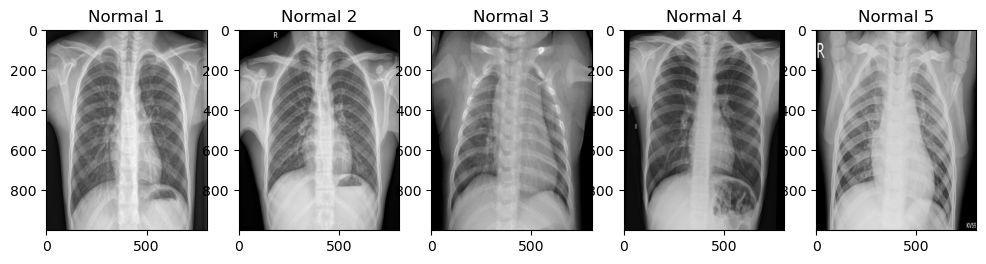

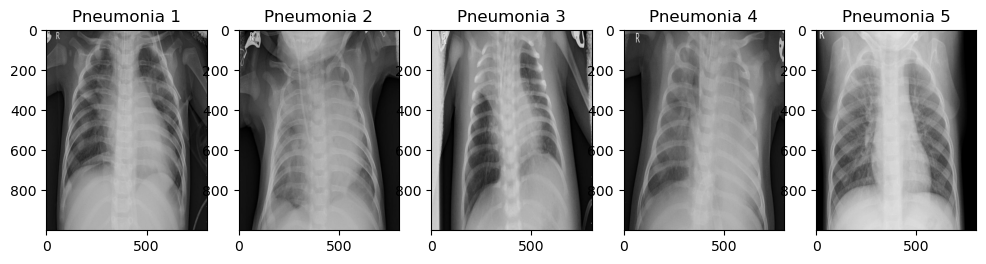

In [29]:
#shows 5 sample images from the given batch
def show_samples(images, label):
    plt.figure(figsize=(12, 4))
    
    # plots each image in a row
    for i in range(5):  
        plt.subplot(1, 5, i + 1)  
        plt.imshow(images[i, :, :, 0], cmap='gray')  
        plt.title(label + " " + str(i+1))  
    plt.show() 

show_samples(normal_imgs, "Normal")
show_samples(pneumonia_imgs, "Pneumonia")

<h2>5 -- Crop center of the images

Cropped Normal shape: (234, 800, 700, 1)
Cropped Pneumonia shape: (390, 800, 700, 1)


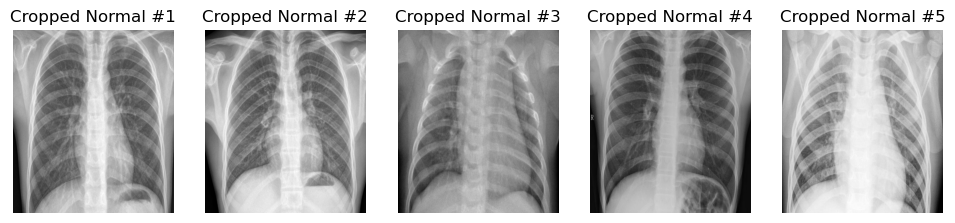

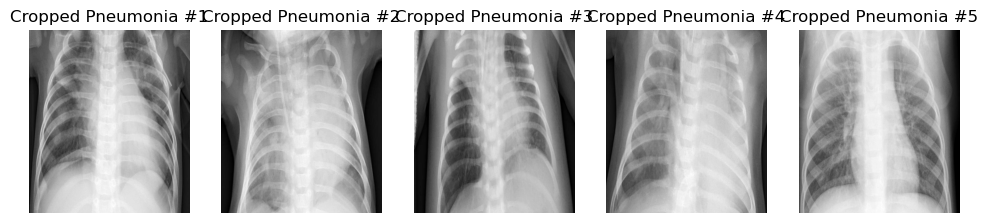

In [25]:
def crop_center(imgs):
    return imgs[:, 100:img_h-100, 50:img_w-50, :]

cropped_normal = crop_center(normal_imgs)
cropped_pneumonia = crop_center(pneumonia_imgs)

print("Cropped Normal shape:", cropped_normal.shape)
print("Cropped Pneumonia shape:", cropped_pneumonia.shape)

show_samples(cropped_normal, "Cropped Normal")
show_samples(cropped_pneumonia, "Cropped Pneumonia")

<h2>6 -- Crop right half of the image

Right-half Normal shape: (234, 1000, 400, 1)
Right-half Pneumonia shape: (390, 1000, 400, 1)


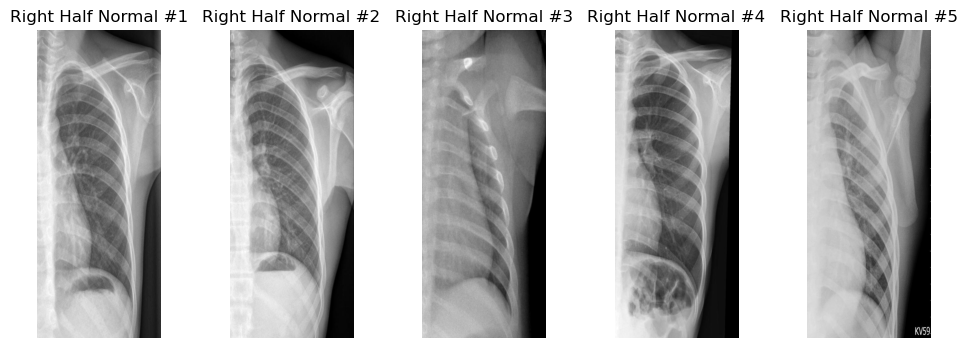

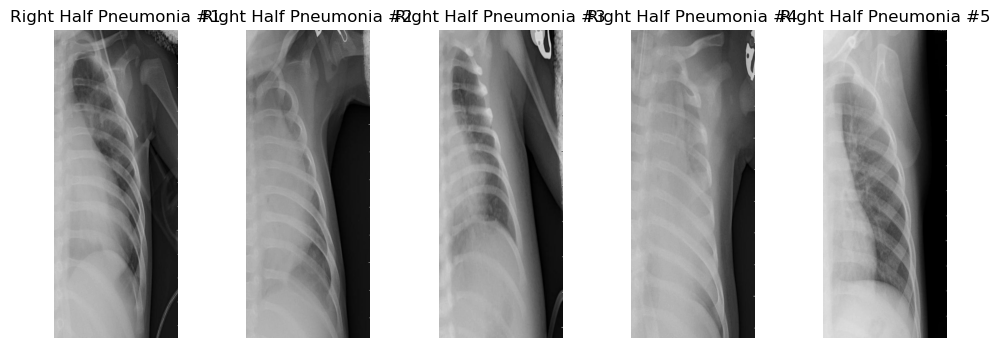

In [26]:
def crop_right_half(imgs):
    return imgs[:, :, img_w//2:, :]

right_half_normal = crop_right_half(normal_imgs)
right_half_pneumonia = crop_right_half(pneumonia_imgs)

print("Right-half Normal shape:", right_half_normal.shape)
print("Right-half Pneumonia shape:", right_half_pneumonia.shape)

show_samples(right_half_normal, "Right Half Normal")
show_samples(right_half_pneumonia, "Right Half Pneumonia")